# Data Science Project - Modeling Price for Pizza Restaurant

In [1]:
import pandas as pd
import numpy as np 
import matplotlib as plt 
import seaborn as sns 
%matplotlib inline

In [43]:
filepath = "C:/Users/herre/JupyterNotebooks/Notebooks/PortfolioCAHL/PortfolioCAHL/Data Science/PythonDAnalysis/DatabasePizzaProject/pizza_sales.csv"
df_pizza = pd.read_csv(filepath)

In [44]:
df_pizza.columns

Index(['pizza_id', 'order_id', 'pizza_name_id', 'quantity', 'order_date',
       'order_time', 'unit_price', 'total_price', 'pizza_size',
       'pizza_category', 'pizza_ingredients', 'pizza_name'],
      dtype='object')

## Data Wrangling

### Basic Info

In [45]:
df_pizza.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pizza_id           48620 non-null  int64  
 1   order_id           48620 non-null  int64  
 2   pizza_name_id      48620 non-null  object 
 3   quantity           48620 non-null  int64  
 4   order_date         48620 non-null  object 
 5   order_time         48620 non-null  object 
 6   unit_price         48620 non-null  float64
 7   total_price        48620 non-null  float64
 8   pizza_size         48620 non-null  object 
 9   pizza_category     48620 non-null  object 
 10  pizza_ingredients  48620 non-null  object 
 11  pizza_name         48620 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 4.5+ MB


In [46]:
df_pizza.head(5)

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,01-01-2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,01-01-2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,01-01-2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,01-01-2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,01-01-2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


### Missing Values

In [47]:
missing_values = df_pizza.isnull().any()
missing_values

pizza_id             False
order_id             False
pizza_name_id        False
quantity             False
order_date           False
order_time           False
unit_price           False
total_price          False
pizza_size           False
pizza_category       False
pizza_ingredients    False
pizza_name           False
dtype: bool

In [48]:
df_pizza['order_date']

0        01-01-2015
1        01-01-2015
2        01-01-2015
3        01-01-2015
4        01-01-2015
            ...    
48615    31-12-2015
48616    31-12-2015
48617    31-12-2015
48618    31-12-2015
48619    31-12-2015
Name: order_date, Length: 48620, dtype: object

### Correct Data Format

In [111]:
df_pizza['order_date'] = pd.to_datetime(df_pizza['order_date'], format='%d-%m-%Y')
df_pizza['year'] = df_pizza['order_date'].dt.year
df_pizza['month_number'] = df_pizza['order_date'].dt.month
df_pizza['month_name'] = df_pizza['order_date'].dt.month_name()
df_pizza['day_number'] = df_pizza['order_date'].dt.day
df_pizza['day_name']= df_pizza['order_date'].dt.day_name()
df_pizza['total_price'] = pd.to_numeric(df_pizza['total_price'])
df_pizza['unit_price'] = pd.to_numeric(df_pizza['unit_price'])


In [50]:
def assign_num_day(x):
    if x == 'monday':
        return 1
    elif x == 'Tuesday':
        return 2
    elif x == 'Wednesday':
        return 3
    elif x == 'Thursday':
        return 4
    elif x == 'Friday':
        return 5
    elif x == 'Saturday':
        return 6
    else:
        return 7

df_pizza['day_num'] = df_pizza['day_name'].apply(assign_num_day)

df_pizza[['day_name', 'day_num']]

,day_name,day_num
0,Thursday,4
1,Thursday,4
2,Thursday,4
3,Thursday,4
4,Thursday,4
...,...,...
48615,Thursday,4
48616,Thursday,4
48617,Thursday,4
48618,Thursday,4


In [51]:
df_pizza['pizza_size'].unique()

array(['M', 'L', 'S', 'XL', 'XXL'], dtype=object)

In [52]:
size_mapping = {'S':'Regular','M':'Medium','XXL':'XXLarge', 'XL':'XLarge','L':'Large'}
df_pizza['pizza_size']=df_pizza['pizza_size'].map(size_mapping)
df_pizza['pizza_size'].unique()
    

array(['Medium', 'Large', 'Regular', 'XLarge', 'XXLarge'], dtype=object)

### Data Normalization

In [67]:
df_pizza['quantity_norm'] =df_pizza['quantity']/df_pizza['quantity'].max()

## Descriptive Analysis

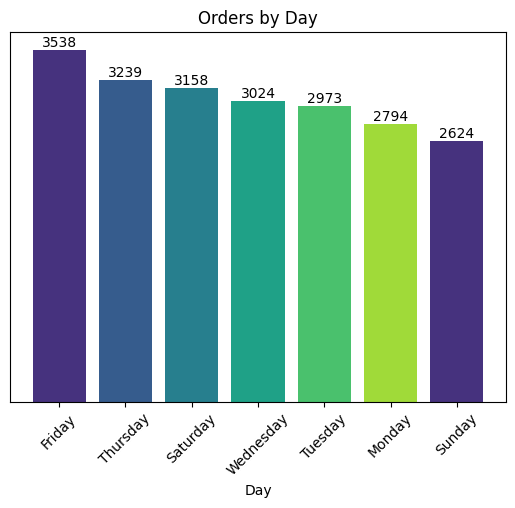

In [139]:
# Orders by Day name
orders_per_day_name = df_pizza.groupby('day_name')['order_id'].nunique().sort_values(ascending=False)

ax = plt.bar(orders_per_day_name.index, orders_per_day_name, color=sns.color_palette("viridis"))

ax = plt.gca()
ax.axes.yaxis.set_ticks([])

plt.xlabel('Day')
plt.title('Orders by Day')

ax.bar_label(ax.containers[0])

plt.xticks(rotation=45)

plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

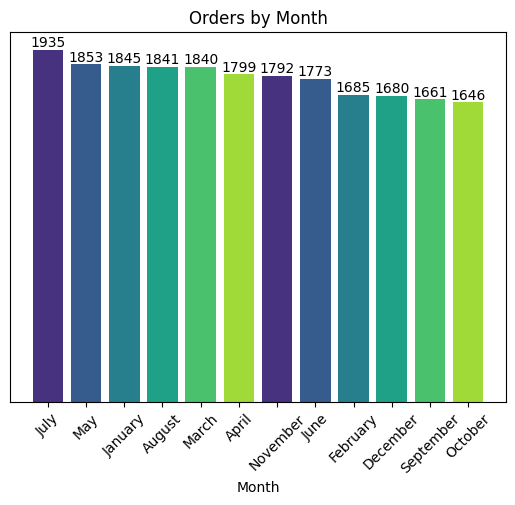

In [138]:
orders_per_month = df_pizza.groupby('month_name')['order_id'].nunique().sort_values(ascending=False)

ax = plt.bar(orders_per_month.index, orders_per_month, color = sns.color_palette('viridis'))

ax = plt.gca()
ax.axes.yaxis.set_ticks([])

plt.xlabel('Month')
plt.title('Orders by Month')

ax.bar_label(ax.containers[0])

plt.xticks(rotation=45)

plt.show

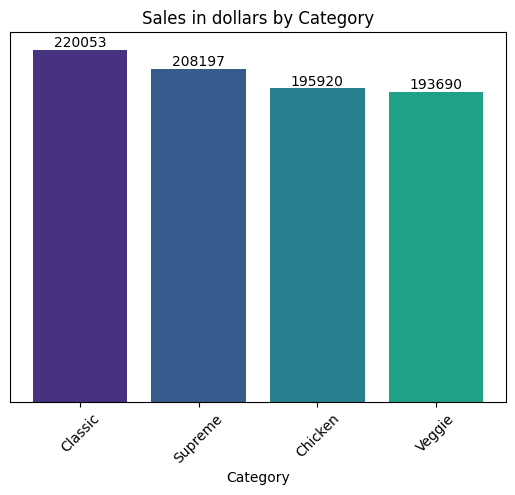

In [137]:
# Sales by category
sales_category = df_pizza.groupby('pizza_category')['total_price'].sum().sort_values(ascending=False)

ax = plt.bar(sales_category.index, sales_category, color=sns.color_palette("viridis"))

ax = plt.gca()
ax.axes.yaxis.set_ticks([])

ax.bar_label(ax.containers[0])

plt.xlabel('Category')
plt.title('Sales in dollars by Category')

plt.xticks(rotation=45)

plt.show()

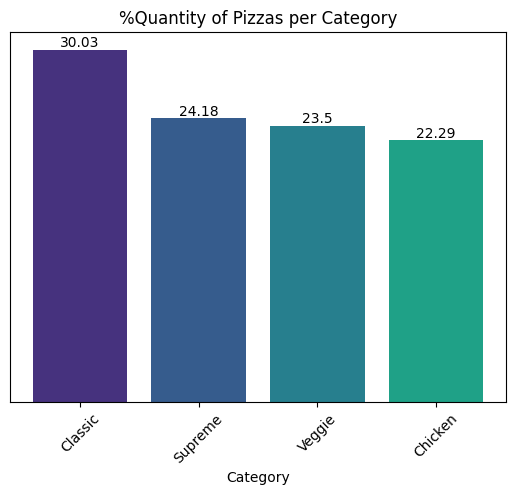

In [149]:
# Quantity per Category

quantity_per_category = ((((df_pizza.groupby('pizza_category')['quantity'].sum())/df_pizza['quantity'].sum())*100).round(2)).sort_values(ascending=False)

ax = plt.bar(quantity_per_category.index, quantity_per_category, color = sns.color_palette('viridis'))

ax = plt.gca()
ax.axes.yaxis.set_ticks([])

plt.xlabel('Category')
plt.title('%Quantity of Pizzas per Category')

ax.bar_label(ax.containers[0])

plt.xticks(rotation=45)

plt.show()

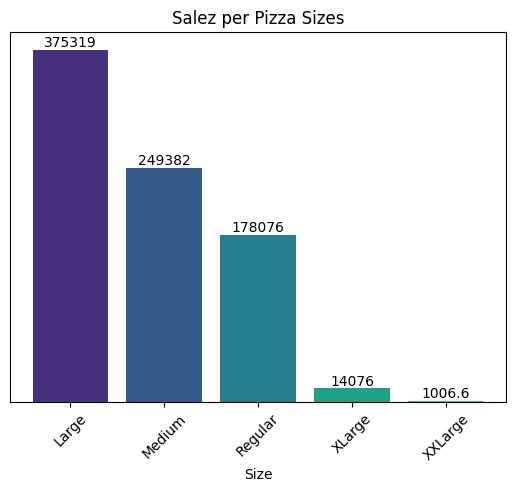

In [145]:
# Sales by pizza sizes

sales_size = df_pizza.groupby('pizza_size')['total_price'].sum().sort_values(ascending=False)

ax = plt.bar(sales_size.index, sales_size, color = sns.color_palette('viridis'))

ax = plt.gca()
ax.axes.yaxis.set_ticks([])

plt.xlabel('Size')
plt.title('Salez per Pizza Sizes')

ax.bar_label(ax.containers[0])

plt.xticks(rotation=45)

plt.show()

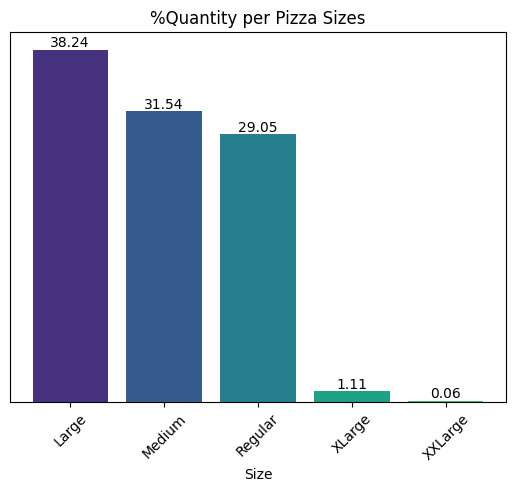

In [152]:
# Quantity per Pizza Size
quantity_per_size = ((((df_pizza.groupby('pizza_size')['quantity'].sum())/df_pizza['quantity'].sum())*100).round(2)).sort_values(ascending=False)

ax = plt.bar(quantity_per_size.index, quantity_per_size, color = sns.color_palette('viridis'))

ax = plt.gca()
ax.axes.yaxis.set_ticks([])

plt.xlabel('Size')
plt.title('%Quantity per Pizza Sizes')

ax.bar_label(ax.containers[0])

plt.xticks(rotation=45)

plt.show()


In [134]:
df_pizza.columns

Index(['pizza_id', 'order_id', 'pizza_name_id', 'quantity', 'order_date',
       'order_time', 'unit_price', 'total_price', 'pizza_size',
       'pizza_category', 'pizza_ingredients', 'pizza_name', 'year',
       'month_number', 'month_name', 'day_number', 'day_name', 'day_num',
       'quantity_norm'],
      dtype='object')

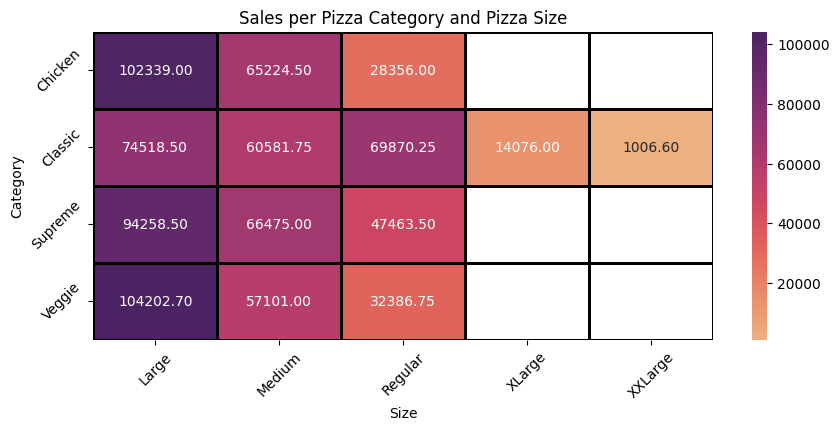

In [190]:
import seaborn as sns

cat_size_sales = (df_pizza.groupby(['pizza_category','pizza_size'])['total_price'].sum())
pivot_cat_size_sales = cat_size_sales.reset_index().pivot(index='pizza_category', columns='pizza_size',values='total_price')


plt.figure(figsize=(10, 4))
sns.heatmap(data=pivot_cat_size_sales, annot=True, fmt='.2f', linewidths=0.8, linecolor='black',cmap='flare')
plt.title('Sales per Pizza Category and Pizza Size')
plt.xlabel('Size')
plt.ylabel('Category')
plt.xticks(rotation=45)
plt.yticks(rotation=45)

plt.show()

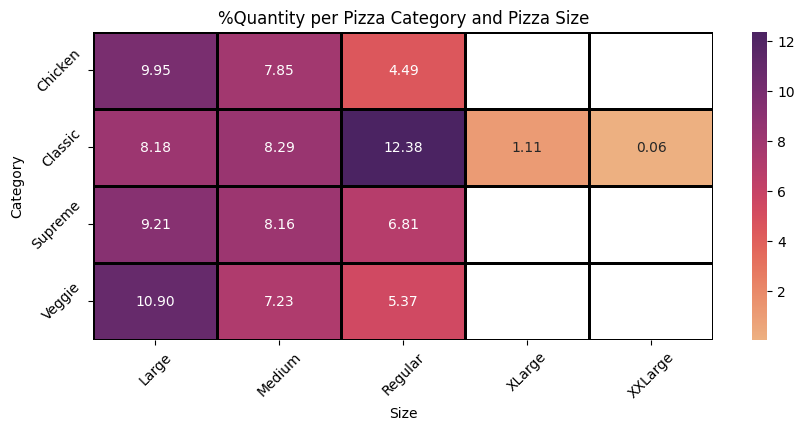

In [192]:
import seaborn as sns

cat_size_quantity = ((df_pizza.groupby(['pizza_category','pizza_size'])['quantity'].sum())/df_pizza['quantity'].sum())*100
pivot_cat_size_quantity = cat_size_quantity.reset_index().pivot(index='pizza_category', columns='pizza_size',values='quantity')


plt.figure(figsize=(10, 4))
sns.heatmap(data=pivot_cat_size_quantity, annot=True, fmt='.2f', linewidths=0.8, linecolor='black',cmap='flare')
plt.title('%Quantity per Pizza Category and Pizza Size')
plt.xlabel('Size')
plt.ylabel('Category')
plt.xticks(rotation=45)
plt.yticks(rotation=45)

plt.show()

## Regression Analysis

### Correlation

In [ ]:
# Correlation
